# Personal Loan data
### data from:  [Personal Loan](https://www.kaggle.com/itsmesunil/bank-loan-modelling) 
#### The department wants to build a model that will help them identify the potential customers who have a higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

## 1. Look around the data

In [6]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn")
sns.set(font_scale = 1)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [7]:
bk = pd.read_excel('Personal_Loan.xlsx', sheet_name = 'Data')

In [8]:
bk.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Column descriptions: 

##### ID: Customer ID 
##### Age: Customer's age in completed years 
##### Experience: years of professional experience 
##### Income: Annual income of the customer 
##### ZIPCode: Home Address ZIP code. 
##### Family: Family size of the customer 
##### CCAvg: Average spending on credit cards per month
##### Education: 1-undergrad, 2-graduate, 3-advanced/professional
##### Mortgae: value of house mortgage if any
##### Personal Loan: Did this customer accept the personal loan offered in the last campaign? 
##### Securities Account: Does the customer have a securities account with the bank? 
##### CD Account: Does the customer have a certificate of deposit (CD) account with the bank? 
##### Online: Does the customer use internet banking facilities? 
##### CreditCard: Does the customer uses a credit card issued by UniversalBank?

In [9]:
bk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [10]:
bk.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [11]:
#Categorical Variables:
#ID, zipcode, education, personal loan, securities account, cd account, online, credit card

In [12]:
#Continuous Variables:
#age, experience, income, family, ccavg, mortgage

In [13]:
#look around the categorical variables
print('Education: ', bk['Education'].unique())
print('Personal Loan: ', bk['Personal Loan'].unique())
print('Securities Account: ', bk['Securities Account'].unique())
print('CD Account: ', bk['CD Account'].unique())
print('Online: ', bk['Online'].unique())
print('CreditCard: ', bk['CreditCard'].unique())

Education:  [1 2 3]
Personal Loan:  [0 1]
Securities Account:  [1 0]
CD Account:  [0 1]
Online:  [0 1]
CreditCard:  [0 1]


In [14]:
print("The total number of data: ", bk.shape[0]*bk.shape[1])
print("The total number of null values: {} and it occupies {:.2f}% of the total ".format(bk.isnull().sum().sum(), (bk.isnull().sum().sum()*100)/(bk.shape[0]*bk.shape[1])))
print("The customers' age of Thera bank: {} ~ {} years old ".format(min(bk['Age']), max(bk['Age'])))
print("The customers' average income: {}$, the max income is {}$, and should be {:.1f} times of the average".format((bk['Income'].mean()*1000), (bk['Income'].max()*1000), (bk['Income'].max()/bk['Income'].mean())))

The total number of data:  70000
The total number of null values: 0 and it occupies 0.00% of the total 
The customers' age of Thera bank: 23 ~ 67 years old 
The customers' average income: 73774.2$, the max income is 224000$, and should be 3.0 times of the average


## 2.Questions
### *Is 'loan' related with 'income', 'CCavg', and 'Family'? How?
### *Can I see the characteristics of the monthly average money spent as divided segments?
### *Predict whether the new customers are going to get a loan or not by using Logistic Regression.

## 3. Data Preprocessing

### 3-1. Rename the columns.

In [15]:
bk.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [16]:
bk.duplicated().sum()

0

In [17]:
bk.columns = ['id', 'age', 'exp', 'income', 'zip', 'fam', 'ccavg',
       'edu', 'mort', 'loan', 'secu',
       'cd', 'online', 'cc']
bk.columns

Index(['id', 'age', 'exp', 'income', 'zip', 'fam', 'ccavg', 'edu', 'mort',
       'loan', 'secu', 'cd', 'online', 'cc'],
      dtype='object')

### 3-2. Remove the unnecessary columns.

In [18]:
bk1 = bk.drop(['id', 'zip'], axis=1, inplace=False)

In [19]:
bk1.head()

,age,exp,income,fam,ccavg,edu,mort,loan,secu,cd,online,cc
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


### 3-3. Convert some of the columns into *1000

In [20]:
bk1['income'] = bk1['income']*1000
bk1['ccavg'] = bk1['ccavg']*1000
bk1.head(5)

,age,exp,income,fam,ccavg,edu,mort,loan,secu,cd,online,cc
0,25,1,49000,4,1600.0,1,0,0,1,0,0,0
1,45,19,34000,3,1500.0,1,0,0,1,0,0,0
2,39,15,11000,1,1000.0,1,0,0,0,0,0,0
3,35,9,100000,1,2700.0,2,0,0,0,0,0,0
4,35,8,45000,4,1000.0,2,0,0,0,0,0,1


## 4.EDA & Visualization

### 4-1.Insights

In [21]:
#Aggregate the income and loan
df1 = bk1.groupby(['loan'])['income'].agg([np.mean, 'count']).round(2)
df1.rename(columns = {'mean' : 'Income Mean ($)', 'count' : 'Number of people'})

,Income Mean ($),Number of people
loan,,
0,66237.39,4520
1,144745.83,480


In [22]:
#Aggregate the ccavg(per month) and loan
df2 = bk1.groupby('loan')['ccavg'].agg([np.mean, 'count']).round(2)
df2.rename(columns = {'mean' : 'CCAvg Mean ($)', 'count' : 'Number of people'})

,CCAvg Mean ($),Number of people
loan,,
0,1728.98,4520
1,3905.35,480


In [23]:
#Aggregate the family and loan
df3 = bk1.groupby('fam')['loan'].agg([np.mean, 'count']).round(2)
df3.rename(columns = {'mean' : 'Personal Loan Mean', 'count' : 'Number of People'})

,Personal Loan Mean,Number of People
fam,,
1,0.07,1472
2,0.08,1296
3,0.13,1010
4,0.11,1222


### 4-2.Check the distribution of the variables.

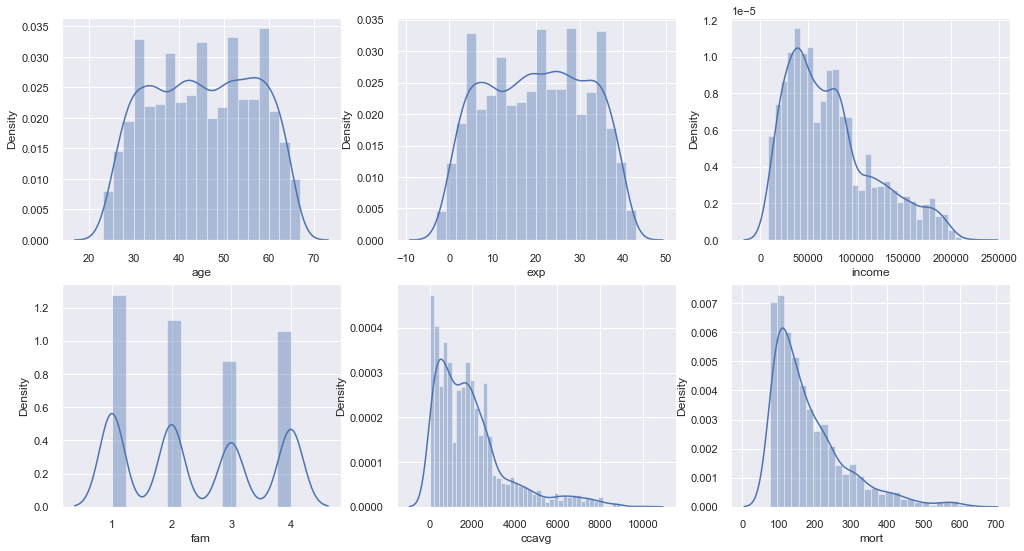

In [24]:
###Check the distribution of the continuous variables
f, ax = plt.subplots(2,3, figsize=(17,9))

sns.distplot(bk1['age'], ax=ax[0,0])
sns.distplot(bk1['exp'], ax=ax[0,1])
sns.distplot(bk1['income'], ax=ax[0,2])
sns.distplot(bk1['fam'], ax=ax[1,0])
sns.distplot(bk1['ccavg'], ax=ax[1,1])
#sns.distplot(bk1['mort'], ax=ax[1,2])
sns.distplot(bk1['mort'][bk1['mort'] != 0], ax=ax[1,2])

plt.show()

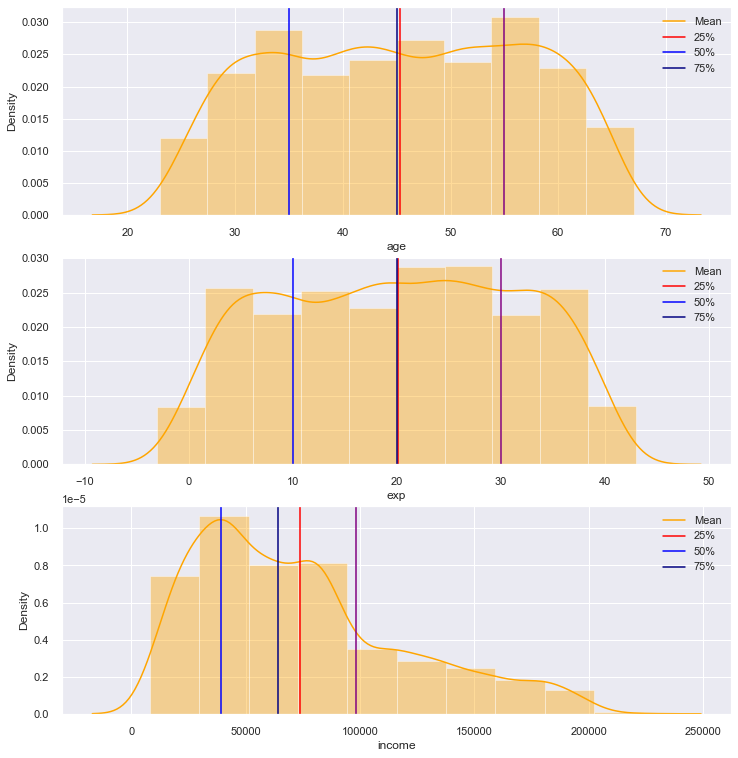

In [25]:
# More detailed graph for age, exp, income.
# Vertical line >> mean ,Q1, Q2(median), Q3,
def drawline(plt, col):
    mean = bk1.describe().loc['mean', col]
    m25 = bk1.describe().loc['25%', col]
    m50 = bk1.describe().loc['50%', col]
    m75 = bk1.describe().loc['75%', col]
    plt.axvline(mean, color = 'red')
    plt.axvline(m25, color = 'blue')
    plt.axvline(m50, color = 'navy')
    plt.axvline(m75, color = 'purple')
    plt.legend({'Mean' : mean, '25%' : m25, '50%' : m50, '75%' : m75})

f, ax = plt.subplots(3,1, figsize=(12,13))

pp = sns.distplot(bk1['age'], ax=ax[0], bins = 10, color = 'orange')
drawline(pp, 'age')
pp = sns.distplot(bk1['exp'], ax=ax[1], bins = 10, color = 'orange')
drawline(pp, 'exp')
pp = sns.distplot(bk1['income'], ax=ax[2], bins = 10, color = 'orange')
drawline(pp, 'income')

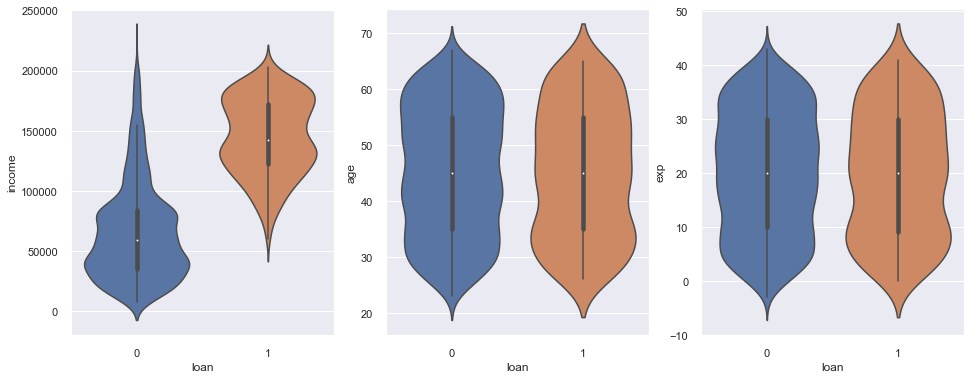

In [26]:
###Check the distribution of the categorical variables

f, ax = plt.subplots(1,3, figsize=(16,6))

sns.violinplot(bk1['loan'], bk1['income'], ax=ax[0])
sns.violinplot(bk1['loan'], bk1['age'], ax=ax[1])
sns.violinplot(bk1['loan'], bk1['exp'], ax=ax[2])

plt.show()
# The customers who earned lots of income tend to get a loan.

### 4-3. Figure out the correlation from the variables.

<AxesSubplot:>

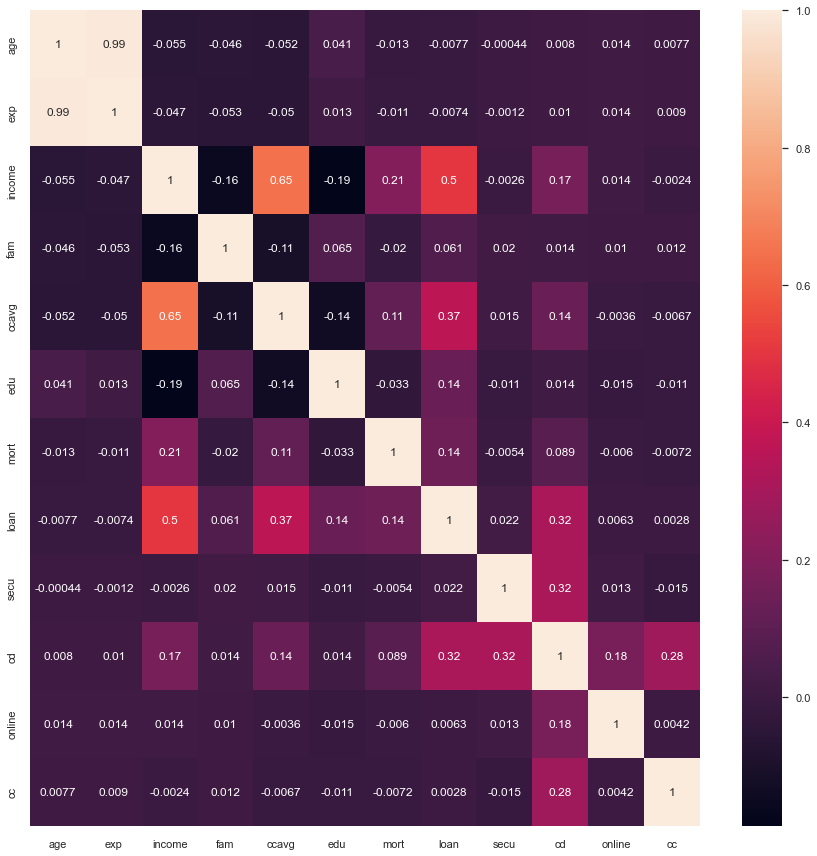

In [27]:
# Heatmap!
f, ax = plt.subplots(1,1, figsize=(15,15))
sns.heatmap(bk1.corr(), ax=ax, annot=True, fmt = '.2g')

#The most correlated is 'age' and 'exp' : 0.99
#The correlation 'ccavg' and 'income' is 0.65
#The 'income' affect the 'ccavg', 'mortgage', 'cd account', and 'loan'.

### 4-4. Let's break down the 'ccavg'. 

In [28]:
df4 = bk1[['ccavg', 'cc', 'loan']]
df4['ccavg_bin'] = pd.cut(df4['ccavg'], bins = [0, 2000, 4000, 6000, 100000], labels = ['0-2000', '3000-4000', '5000-6000', '7000+'])
df4

C:\Users\hyung\AppData\Local\Temp\ipykernel_8040\969951098.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['ccavg_bin'] = pd.cut(df4['ccavg'], bins = [0, 2000, 4000, 6000, 100000], labels = ['0-2000', '3000-4000', '5000-6000', '7000+'])


,ccavg,cc,loan,ccavg_bin
0,1600.0,0,0,0-2000
1,1500.0,0,0,0-2000
2,1000.0,0,0,0-2000
3,2700.0,0,0,3000-4000
4,1000.0,1,0,0-2000
...,...,...,...,...
4995,1900.0,0,0,0-2000
4996,400.0,0,0,0-2000
4997,300.0,0,0,0-2000
4998,500.0,0,0,0-2000


In [29]:
#Aggregate the sum of monthly ccavg depending on whether they have credit card or not per segments.
df5 = df4.groupby(['ccavg_bin', 'cc'])['ccavg'].sum().round(2).reset_index()
df5

,ccavg_bin,cc,ccavg
0,0-2000,0,2172366.67
1,0-2000,1,930333.33
2,3000-4000,0,2361250.00
3,3000-4000,1,970250.00
4,5000-6000,0,1097300.00
5,5000-6000,1,413533.33
6,7000+,0,1236533.33
7,7000+,1,508000.00


<AxesSubplot:xlabel='income', ylabel='ccavg'>

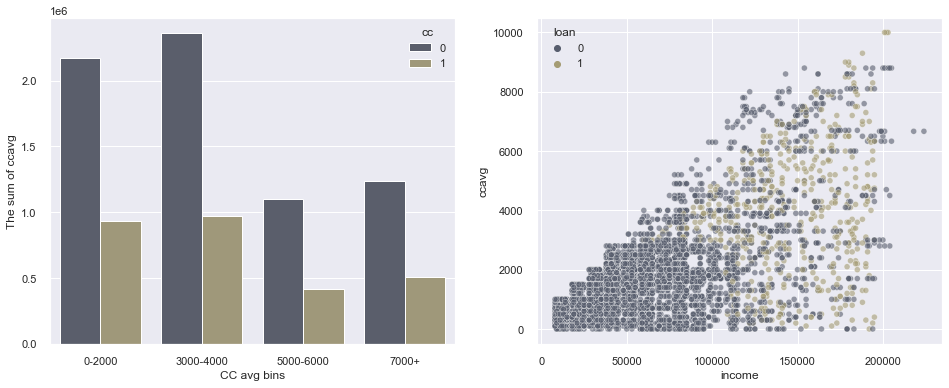

In [60]:
#Visualize the results above.
f, ax = plt.subplots(1,2, figsize=(16,6))

sns.barplot(data = df5, x = 'ccavg_bin', y = 'ccavg', hue = 'cc', palette = "cividis", ax=ax[0])
ax[0].set(xlabel = 'CC avg bins', ylabel = 'The sum of ccavg')

sns.scatterplot(x = 'income', y = 'ccavg', data = bk1, ax=ax[1], hue= 'loan', palette= "cividis", alpha=0.6)

## 5. Logistic Regression

In [31]:
import os

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

import statsmodels.api as sm
import itertools
import time
import sklearn.preprocessing as preprocessing

### 5-1. Split the data into X and y as explanatory variable and target variable. Which customer would get a loan?

In [32]:
#loan should be target variable, and the other columns would be explanatory variable.
feature_columns = list(bk1.columns.difference(['loan']))
feature_columns

['age',
 'cc',
 'ccavg',
 'cd',
 'edu',
 'exp',
 'fam',
 'income',
 'mort',
 'online',
 'secu']

In [33]:
#Explanatory variable
X = bk1[feature_columns]
#Target variable
y = bk1['loan'] # loan: 1 or 0

In [34]:
train_x, test_x, train_y, test_y = train_test_split(X, y, stratify=y, train_size=0.7,random_state=42)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(3500, 11) (1500, 11) (3500,) (1500,)


In [35]:
train_x

,age,cc,ccavg,cd,edu,exp,fam,income,mort,online,secu
1250,47,0,2666.666667,0,2,20,1,81000,0,1,0
206,49,0,1000.000000,0,1,25,1,31000,0,1,1
2762,56,0,3700.000000,0,1,31,2,65000,0,1,0
4276,50,1,7300.000000,0,1,24,1,155000,0,1,0
4802,35,0,2800.000000,0,1,11,3,58000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2805,37,0,5800.000000,0,3,12,3,182000,0,1,0
2341,36,0,1500.000000,0,3,10,1,91000,289,1,0
1585,57,0,2700.000000,0,1,31,2,131000,0,0,0
3152,40,0,1000.000000,0,3,15,1,83000,0,0,0


In [36]:
#The reason why I scaled the columns was to make a normalization.
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.fit_transform(test_x)

In [37]:
train_x

array([[ 0.1419242 , -0.63599873,  0.42481017, ..., -0.55371236,
         0.8242952 , -0.33964703],
       [ 0.31548629, -0.63599873, -0.53177867, ..., -0.55371236,
         0.8242952 ,  2.94423306],
       [ 0.92295362, -0.63599873,  1.01789525, ..., -0.55371236,
         0.8242952 , -0.33964703],
       ...,
       [ 1.00973466, -0.63599873,  0.44394195, ..., -0.55371236,
        -1.21315762, -0.33964703],
       [-0.46554312, -0.63599873, -0.53177867, ..., -0.55371236,
        -1.21315762, -0.33964703],
       [-1.33335358, -0.63599873, -0.589174  , ..., -0.55371236,
         0.8242952 ,  2.94423306]])

### 5-2. Make a model

In [38]:
lrm = LogisticRegression(solver='liblinear', max_iter=2000)

In [39]:
lrm.fit(train_x, train_y)

LogisticRegression(max_iter=2000, solver='liblinear')

In [40]:
coeff_df = pd.DataFrame(lrm.coef_)
coeff_df['Intercept'] = lrm.intercept_
coeff_df

,0,1,2,3,4,5,6,7,8,9,10,Intercept
0,-0.250034,-0.481869,0.228485,0.90614,1.319806,0.271172,0.755312,2.291312,0.068812,-0.312519,-0.313708,-4.414426


### 5-3. Go over the modeling result.

In [43]:
# Put the training data into the model, and check the accuracy_score.
training_predict = lrm.predict(train_x)
print("The accuracy: {:.4f} when train_x is adapted to this model ".format(metrics.accuracy_score(train_y, training_predict)))

The accuracy: 0.9517 when train_x is adapted to this model 


In [44]:
# Put the training data into the model, and check the accuracy_score.
test_predict = lrm.predict(test_x)
print("The accuracy: {:.4f} when test_x is adapted to this model ".format(metrics.accuracy_score(test_y, test_predict)))

The accuracy: 0.9527 when test_x is adapted to this model 


### 5-4. Confusion matrix & Report

In [45]:
logistic_cm = metrics.confusion_matrix(test_y, test_predict, labels=[1,0])
print(logistic_cm)

[[  95   49]
 [  22 1334]]


In [47]:
logistic_cm_df = pd.DataFrame(logistic_cm, index = [i for i in ['1','0']], columns = [i for i in ['predict 1', 'predict 0']])
logistic_cm_df

,predict 1,predict 0
1,95,49
0,22,1334


Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression Model')

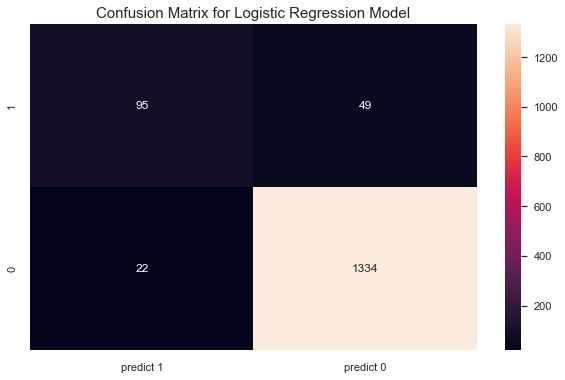

In [58]:
f, ax = plt.subplots(1, 1, figsize = (10, 6))

sns.heatmap(logistic_cm_df, annot=True, fmt='g', ax=ax)
plt.title("Confusion Matrix for Logistic Regression Model",size =15)

#True Positives (TP): 대출 제안을 받을 사람을 정확하게 예측  =  95
#True Negatives (TN): 대출 제안을 거절할 사람을 정확하게 예측  =  1334
#False Positives (FP): 대출 제안을 받을 것으로 잘못 판단(Type I error)  =  22
#False Negatives (FN): 대출 제안을 받지 않을 것으로 잘못 판단(Type II error)  =  49


In [59]:
print("Logistic Regression Model - Classification Report")
print('')
print(metrics.classification_report(test_y, test_predict, labels=[1,0]))

Logistic Regression Model - Classification Report

              precision    recall  f1-score   support

           1       0.81      0.66      0.73       144
           0       0.96      0.98      0.97      1356

    accuracy                           0.95      1500
   macro avg       0.89      0.82      0.85      1500
weighted avg       0.95      0.95      0.95      1500



## 6.Review

### Thera bank data:
#### The total number of data:  70000
#### The total number of null values: 0 and it occupies 0.00% of the total 
#### The customers' age of Thera bank: 23 ~ 67 years old 
#### The customers' average income: 73774 the max income is 224000, and should be 3.0 times of the average 

### Q: Is 'loan' related with 'income', 'CCavg', and 'Family'? How?
#### A: 1. The customers' income who already got a loan are three times higher than that of the non-loan  customers. 2. The customers who already got a loan spent 'ccavg' two times higher than that of non-loan customers. 3.The number of family is not related with the loan.

### Q: Can I see the characteristics of the monthly average money spent as divided segments?
#### A: Yes, refer to 4-4.

### Q: Can I predict whether the new customers are going to get a loan or not by using Logistic Regression
#### A: Yes, I made it! 